In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv(r'D:\original\TensorFlow_FILES\DATA\cancer_classification.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


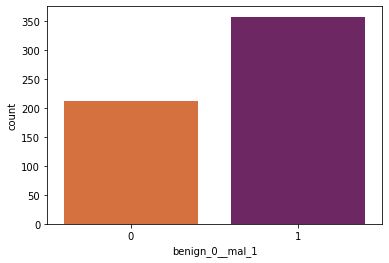

In [8]:
sns.countplot(df['benign_0__mal_1'], palette ='inferno_r')

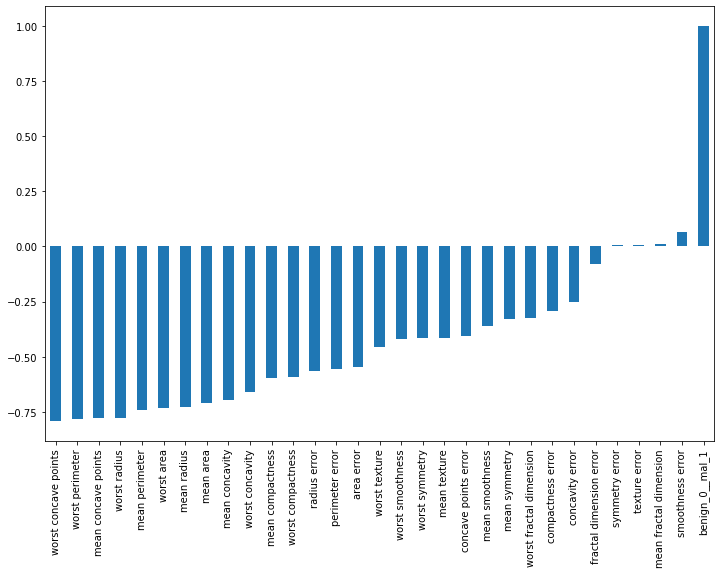

In [13]:
plt.figure(figsize = (12,8))
df.corr()['benign_0__mal_1'].sort_values().plot(kind = 'bar')

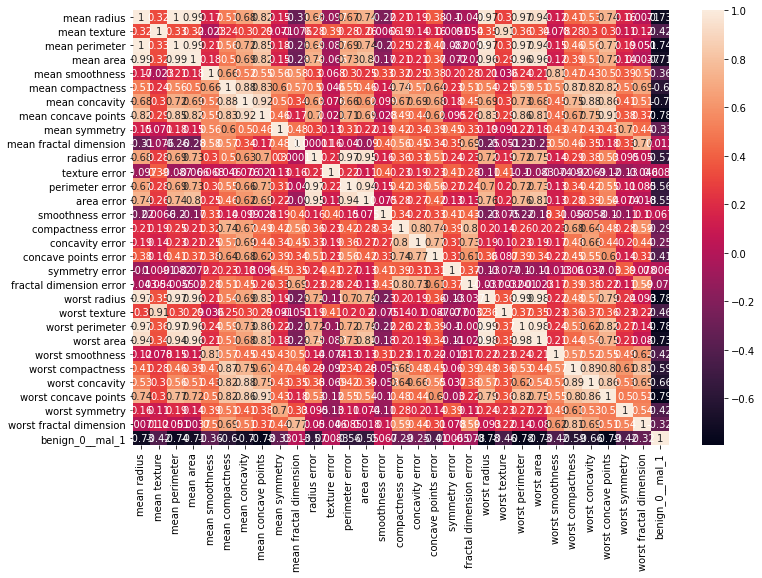

In [17]:
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), annot = True)

In [18]:
X = df.drop('benign_0__mal_1',axis = 1).values
y = df['benign_0__mal_1'].values

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.25, random_state = 101)

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler()

In [23]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))

model.add(Dense(units = 15, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [28]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6916 - val_loss: 0.6794
Epoch 2/600
426/426 [==============================] - 0s 114us/sample - loss: 0.6611 - val_loss: 0.6473
Epoch 3/600
426/426 [==============================] - 0s 131us/sample - loss: 0.6311 - val_loss: 0.6118
Epoch 4/600
426/426 [==============================] - 0s 134us/sample - loss: 0.5976 - val_loss: 0.5729
Epoch 5/600
426/426 [==============================] - 0s 142us/sample - loss: 0.5577 - val_loss: 0.5266
Epoch 6/600
426/426 [==============================] - 0s 155us/sample - loss: 0.5118 - val_loss: 0.4727
Epoch 7/600
426/426 [==============================] - 0s 151us/sample - loss: 0.4584 - val_loss: 0.4174
Epoch 8/600
426/426 [==============================] - 0s 146us/sample - loss: 0.4078 - val_loss: 0.3648
Epoch 9/600
426/426 [==============================] - 0s 151us/sample - loss: 0.3611 - val_loss: 0.3185
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 132us/sample - loss: 0.0535 - val_loss: 0.2323
Epoch 79/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0512 - val_loss: 0.2975
Epoch 80/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0524 - val_loss: 0.2528
Epoch 81/600
426/426 [==============================] - 0s 158us/sample - loss: 0.0515 - val_loss: 0.2616
Epoch 82/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0516 - val_loss: 0.2566
Epoch 83/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0585 - val_loss: 0.2659
Epoch 84/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0508 - val_loss: 0.2407
Epoch 85/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0522 - val_loss: 0.2878
Epoch 86/600
426/426 [==============================] - 0s 155us/sample - loss: 0.0576 - val_loss: 0.2601
Epoch 87/600
426/426 [========================

Epoch 155/600
426/426 [==============================] - 0s 186us/sample - loss: 0.0403 - val_loss: 0.3375
Epoch 156/600
426/426 [==============================] - 0s 147us/sample - loss: 0.0408 - val_loss: 0.3924
Epoch 157/600
426/426 [==============================] - 0s 171us/sample - loss: 0.0393 - val_loss: 0.3756
Epoch 158/600
426/426 [==============================] - 0s 157us/sample - loss: 0.0463 - val_loss: 0.4258
Epoch 159/600
426/426 [==============================] - 0s 153us/sample - loss: 0.0392 - val_loss: 0.3765
Epoch 160/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0458 - val_loss: 0.3640
Epoch 161/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0459 - val_loss: 0.3544
Epoch 162/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0383 - val_loss: 0.4493
Epoch 163/600
426/426 [==============================] - 0s 184us/sample - loss: 0.0381 - val_loss: 0.3540
Epoch 164/600
426/426 [==============

426/426 [==============================] - 0s 290us/sample - loss: 0.0326 - val_loss: 0.5791
Epoch 232/600
426/426 [==============================] - 0s 270us/sample - loss: 0.0313 - val_loss: 0.5071
Epoch 233/600
426/426 [==============================] - 0s 330us/sample - loss: 0.0322 - val_loss: 0.4746
Epoch 234/600
426/426 [==============================] - 0s 237us/sample - loss: 0.0409 - val_loss: 0.5750
Epoch 235/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0319 - val_loss: 0.5346
Epoch 236/600
426/426 [==============================] - 0s 130us/sample - loss: 0.0323 - val_loss: 0.5053
Epoch 237/600
426/426 [==============================] - 0s 200us/sample - loss: 0.0320 - val_loss: 0.5250
Epoch 238/600
426/426 [==============================] - 0s 286us/sample - loss: 0.0307 - val_loss: 0.5084
Epoch 239/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0315 - val_loss: 0.4959
Epoch 240/600
426/426 [============================

426/426 [==============================] - 0s 121us/sample - loss: 0.0258 - val_loss: 0.5757
Epoch 308/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0270 - val_loss: 0.6750
Epoch 309/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0250 - val_loss: 0.6492
Epoch 310/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0245 - val_loss: 0.6161
Epoch 311/600
426/426 [==============================] - 0s 177us/sample - loss: 0.0254 - val_loss: 0.6909
Epoch 312/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0288 - val_loss: 0.6436
Epoch 313/600
426/426 [==============================] - 0s 144us/sample - loss: 0.0259 - val_loss: 0.6560
Epoch 314/600
426/426 [==============================] - 0s 160us/sample - loss: 0.0246 - val_loss: 0.6812
Epoch 315/600
426/426 [==============================] - 0s 169us/sample - loss: 0.0269 - val_loss: 0.6799
Epoch 316/600
426/426 [============================

426/426 [==============================] - 0s 126us/sample - loss: 0.0205 - val_loss: 0.7832
Epoch 384/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0202 - val_loss: 0.7858
Epoch 385/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0209 - val_loss: 0.7854
Epoch 386/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0210 - val_loss: 0.8317
Epoch 387/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0200 - val_loss: 0.7876
Epoch 388/600
426/426 [==============================] - 0s 133us/sample - loss: 0.0200 - val_loss: 0.7841
Epoch 389/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0187 - val_loss: 0.8160
Epoch 390/600
426/426 [==============================] - 0s 156us/sample - loss: 0.0203 - val_loss: 0.8009
Epoch 391/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0197 - val_loss: 0.8323
Epoch 392/600
426/426 [============================

426/426 [==============================] - 0s 149us/sample - loss: 0.0251 - val_loss: 1.0534
Epoch 460/600
426/426 [==============================] - 0s 148us/sample - loss: 0.0298 - val_loss: 0.7462
Epoch 461/600
426/426 [==============================] - 0s 159us/sample - loss: 0.0248 - val_loss: 1.0307
Epoch 462/600
426/426 [==============================] - 0s 173us/sample - loss: 0.0163 - val_loss: 0.8352
Epoch 463/600
426/426 [==============================] - 0s 142us/sample - loss: 0.0186 - val_loss: 0.9125
Epoch 464/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0156 - val_loss: 0.9243
Epoch 465/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0173 - val_loss: 0.9559
Epoch 466/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0181 - val_loss: 0.9411
Epoch 467/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0161 - val_loss: 0.9269
Epoch 468/600
426/426 [============================

426/426 [==============================] - 0s 114us/sample - loss: 0.0118 - val_loss: 1.0462
Epoch 536/600
426/426 [==============================] - 0s 162us/sample - loss: 0.0115 - val_loss: 1.0203
Epoch 537/600
426/426 [==============================] - 0s 116us/sample - loss: 0.0122 - val_loss: 1.0623
Epoch 538/600
426/426 [==============================] - 0s 151us/sample - loss: 0.0168 - val_loss: 0.9177
Epoch 539/600
426/426 [==============================] - 0s 110us/sample - loss: 0.0151 - val_loss: 1.1751
Epoch 540/600
426/426 [==============================] - 0s 140us/sample - loss: 0.0157 - val_loss: 0.9969
Epoch 541/600
426/426 [==============================] - 0s 137us/sample - loss: 0.0109 - val_loss: 1.1209
Epoch 542/600
426/426 [==============================] - 0s 170us/sample - loss: 0.0117 - val_loss: 1.0402
Epoch 543/600
426/426 [==============================] - 0s 179us/sample - loss: 0.0108 - val_loss: 1.0757
Epoch 544/600
426/426 [============================

In [30]:
model.history.history

{'loss': [0.6915916685767017,
  0.6611399404319799,
  0.6310910845586392,
  0.5975891606348781,
  0.5576871167606031,
  0.5117881065802955,
  0.45843718980959325,
  0.407772980245626,
  0.36113781912226073,
  0.3159373894403798,
  0.2809862710640464,
  0.2544992687836499,
  0.23122028069037226,
  0.21506104502879397,
  0.2046547615332223,
  0.1956466944284842,
  0.17921608228218947,
  0.16916449654829893,
  0.1614986112419988,
  0.1534945143500404,
  0.1472488693508184,
  0.1458146290879854,
  0.14080455843271783,
  0.128228850207978,
  0.1268686795248672,
  0.11759965691907864,
  0.11494548136079816,
  0.10947069270370152,
  0.10593550015643169,
  0.10151047326029747,
  0.09925456645902893,
  0.09525742686130631,
  0.0933102586354728,
  0.08860640568842351,
  0.0869106370518465,
  0.08841876300847587,
  0.08300080468239779,
  0.08175991510561374,
  0.07854626212321536,
  0.08451038843869044,
  0.07676627172130934,
  0.07459001090080246,
  0.07359000355739828,
  0.07169717798630397,
  

In [31]:
losses = pd.DataFrame(model.history.history)

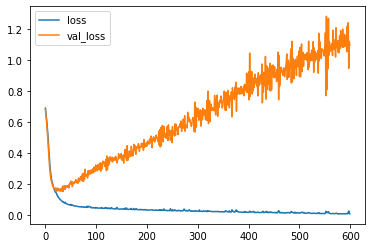

In [34]:
losses.plot(kind = 'line')

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [40]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))

model.add(Dense(units = 15, activation = 'relu'))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [41]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 25)

In [44]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test),
          callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 88us/sample - loss: 0.0207 - val_loss: 0.9235
Epoch 2/600
426/426 [==============================] - 0s 149us/sample - loss: 0.0210 - val_loss: 1.1437
Epoch 3/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0172 - val_loss: 0.9174
Epoch 4/600
426/426 [==============================] - 0s 138us/sample - loss: 0.0213 - val_loss: 1.1122
Epoch 5/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0167 - val_loss: 0.9267
Epoch 6/600
426/426 [==============================] - 0s 143us/sample - loss: 0.0253 - val_loss: 1.2069
Epoch 7/600
426/426 [==============================] - 0s 152us/sample - loss: 0.0220 - val_loss: 0.9562
Epoch 8/600
426/426 [==============================] - 0s 145us/sample - loss: 0.0181 - val_loss: 1.0308
Epoch 9/600
426/426 [==============================] - 0s 135us/sample - loss: 0.0174 - val_loss: 1.0252
Epoch 10/6

In [45]:
model_loss = pd.DataFrame(model.history.history)

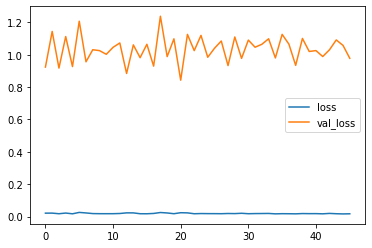

In [46]:
model_loss.plot()

In [47]:
from tensorflow.keras.layers import Dropout

In [48]:
model = Sequential()

model.add(Dense(units = 30, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 15, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')


In [49]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test,y_test),
          callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.7237 - val_loss: 0.6978
Epoch 2/600
426/426 [==============================] - 0s 161us/sample - loss: 0.6937 - val_loss: 0.6697
Epoch 3/600
426/426 [==============================] - 0s 161us/sample - loss: 0.6613 - val_loss: 0.6467
Epoch 4/600
426/426 [==============================] - 0s 201us/sample - loss: 0.6506 - val_loss: 0.6190
Epoch 5/600
426/426 [==============================] - 0s 159us/sample - loss: 0.6290 - val_loss: 0.5921
Epoch 6/600
426/426 [==============================] - 0s 152us/sample - loss: 0.6142 - val_loss: 0.5697
Epoch 7/600
426/426 [==============================] - 0s 164us/sample - loss: 0.6008 - val_loss: 0.5463
Epoch 8/600
426/426 [==============================] - 0s 192us/sample - loss: 0.5729 - val_loss: 0.5213
Epoch 9/600
426/426 [==============================] - 0s 170us/sample - loss: 0.5610 - val_loss: 0.4945
Epoch 10/60

In [50]:
modelloss = pd.DataFrame(model.history.history)

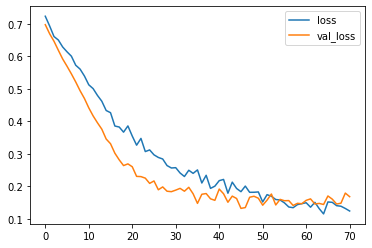

In [51]:
modelloss.plot()

In [53]:
Y_pred = model.predict_classes(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
print(classification_report(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92        55
           1       0.99      0.90      0.94        88

    accuracy                           0.93       143
   macro avg       0.92      0.94      0.93       143
weighted avg       0.94      0.93      0.93       143



In [56]:
print(confusion_matrix(y_test, Y_pred))

[[54  1]
 [ 9 79]]
